<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/28_Ultra_Pro_%D0%A2%D1%80%D0%B0%D1%84%D1%84%D0%B8%D0%BA_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra pro

Макс 10 баллов

Возьмите базу трафика с сайта компании. Напишите модель для прогнозирования трафика. База трафик сайта https://drive.google.com/open?id=1hU_-9dJ2qPDDGThIdwRkOKxmWgox92V3

Возьмите xLen = 60. Добейтесь максимально точного соответствия между графиками корреляции исходного сигнала и прогноза.

In [ ]:
#Загружаем библиотеки
import pandas as pd #Пандас
import matplotlib.pyplot as plt #Отрисовка графиков
import numpy as np #Numpy
from tensorflow.keras.optimizers import Adam #Оптимизатор
from tensorflow.keras.models import Sequential, Model #Два варианта моделей
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D, MaxPooling1D #Стандартные слои
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Нормировщики
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # для генерации выборки временных рядов

# Рисовать графики сразу же
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Базы/traff.csv', sep=',')
data

,1/1/2017,"22,226.00"
0,1/2/2017,"29,593.00"
1,1/3/2017,"31,726.00"
2,1/4/2017,"32,684.00"
3,1/5/2017,"31,820.00"
4,1/6/2017,"29,354.00"
...,...,...
1089,12/27/2019,"29,801.00"
1090,12/28/2019,"34,913.00"
1091,12/29/2019,"37,665.00"
1092,12/30/2019,"32,643.00"


In [ ]:
print(data.dtypes)
data.iloc[:,[0]]


1/1/2017     object
22,226.00    object
dtype: object


,1/1/2017
0,1/2/2017
1,1/3/2017
2,1/4/2017
3,1/5/2017
4,1/6/2017
...,...
1089,12/27/2019
1090,12/28/2019
1091,12/29/2019
1092,12/30/2019


In [ ]:

data.iloc[:0,[0]].dtypes


1/1/2017    object
dtype: object

In [ ]:
df = data.iloc[:,[1]]
df

,"22,226.00"
0,"29,593.00"
1,"31,726.00"
2,"32,684.00"
3,"31,820.00"
4,"29,354.00"
...,...
1089,"29,801.00"
1090,"34,913.00"
1091,"37,665.00"
1092,"32,643.00"


In [ ]:
np_df = np.array(df.values)  # numpy массив 


In [ ]:
np_df[0]

array(['29,593.00'], dtype=object)

In [ ]:
np_df.shape

(1094, 1)

In [ ]:
np_df

array([['29,593.00'],
       ['31,726.00'],
       ['32,684.00'],
       ...,
       ['37,665.00'],
       ['32,643.00'],
       ['28,212.00']], dtype=object)

In [ ]:
np_df[1][0]


'31,726.00'

In [ ]:
#в цикле обходим массив с данными о стоимости и преобразуем данные из типа object в float для подачи в нейронку
new_df = []
for i in range(np_df.shape[0]):
  element_float = float(str(np_df[i][0]).partition(".")[0].replace(',', ''))
  new_df.append(element_float)


In [ ]:
print(new_df)
print(len(new_df))
print(max(new_df), min(new_df))
# буду использовать Standardscaler() разница между крайними значениями небольшая

[29593.0, 31726.0, 32684.0, 31820.0, 29354.0, 29139.0, 31244.0, 32690.0, 31299.0, 29738.0, 29400.0, 27039.0, 28251.0, 30270.0, 30152.0, 28751.0, 27668.0, 27375.0, 26558.0, 28214.0, 30137.0, 29739.0, 28169.0, 27699.0, 28201.0, 27708.0, 28763.0, 31847.0, 31738.0, 29196.0, 27772.0, 27152.0, 27154.0, 28379.0, 30248.0, 28936.0, 27963.0, 27730.0, 27356.0, 26631.0, 28464.0, 30550.0, 29127.0, 27426.0, 29624.0, 28945.0, 28368.0, 29646.0, 30928.0, 29773.0, 28921.0, 27241.0, 26094.0, 27678.0, 28519.0, 30420.0, 30337.0, 27452.0, 26650.0, 25656.0, 24999.0, 26051.0, 27694.0, 26008.0, 23420.0, 23335.0, 25800.0, 25410.0, 25773.0, 27315.0, 26002.0, 24594.0, 23758.0, 23854.0, 22655.0, 23855.0, 26421.0, 25306.0, 24080.0, 23588.0, 22519.0, 22126.0, 22794.0, 25495.0, 25005.0, 24529.0, 23607.0, 23676.0, 22647.0, 22888.0, 25176.0, 23375.0, 23299.0, 23215.0, 23533.0, 22561.0, 22536.0, 24567.0, 23778.0, 22773.0, 22080.0, 21890.0, 21924.0, 21656.0, 22285.0, 24203.0, 23897.0, 23285.0, 22639.0, 22441.0, 22997.0, 

In [ ]:
#Формируем параметры загрузки данных

xLen = 60                      #Анализируем по 60 прошедшим точкам 
valLen = 200                  #Используем 200 записей для проверки

trainLen = len(new_df)-valLen # Размер тренировочной выборки



In [ ]:
#Делаем reshape,т.к. у нас только один столбец по одному значению
new_df = np.reshape(new_df,(-1,1))
print(new_df.shape)

#Делим данные на тренировочную и тестовую выборки 
xTrain, xTest = new_df[:trainLen], new_df[trainLen+xLen+2:]

(1094, 1)


In [ ]:
#Масштабируем данные (отдельно для X и Y), чтобы их легче было скормить сетке
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

In [ ]:
yTrain, yTest = new_df[:trainLen], new_df[trainLen+xLen+2:] 
yScaler = StandardScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest = yScaler.transform(yTest)



In [ ]:
print(xTrain.shape)

(894, 1)


In [ ]:
#Создаем генератор для обучения
trainDataGen = TimeseriesGenerator(xTrain, yTrain,           #В качестве параметров наши выборки
                               length=xLen, stride=1, sampling_rate=1, #Для каждой точки (из промежутка длины xLen)
                               batch_size=8)                #Размер batch, который будем скармливать модели

#Создаем аналогичный генератор для валидации при обучении
testDataGen = TimeseriesGenerator(xTest, yTest,
                               length=xLen, stride=1,
                               batch_size=8)

In [ ]:
print(trainDataGen[0][0].shape,
      trainDataGen[0][1].shape)

(8, 60, 1) (8, 1)


In [ ]:
# Функция рассчитываем результаты прогнозирования сети
# В аргументы принимает сеть (currModel) и проверочную выборку
# Выдаёт результаты предсказания predVal
# И правильные ответы в исходной размерности yValUnscaled (какими они были до нормирования)
def getPred(currModel, xVal, yVal, yScaler):
  # Предсказываем ответ сети по проверочной выборке
  # И возвращаем исходны масштаб данных, до нормализации
  predVal = yScaler.inverse_transform(currModel.predict(xVal))
  yValUnscaled = yScaler.inverse_transform(yVal)
  
  return (predVal, yValUnscaled)

# Функция визуализирует графики, что предсказала сеть и какие были правильные ответы
# start - точка с которой начинаем отрисовку графика
# step - длина графика, которую отрисовываем
# channel - какой канал отрисовываем
def showPredict(start, step, channel, predVal, yValUnscaled):
  plt.figure(figsize=(22,6))
  plt.plot(predVal[start:start+step, 0],
           label='Прогноз')
  plt.plot(yValUnscaled[start:start+step, channel], 
           label='Базовый ряд')
  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()
  
# Функция расёта корреляции дух одномерных векторов
def correlate(a, b):
  # Рассчитываем основные показатели
  ma = a.mean() # Среднее значение первого вектора
  mb = b.mean() # Среднее значение второго вектора
  mab = (a*b).mean() # Среднее значение произведения векторов
  sa = a.std() # Среднеквадратичное отклонение первого вектора
  sb = b.std() # Среднеквадратичное отклонение второго вектора
  
  #Рассчитываем корреляцию
  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb)/(sa*sb)
  return val

# Функция рисуем корреляцию прогнозированного сигнала с правильным
# Смещая на различное количество шагов назад
# Для проверки появления эффекта автокорреляции
# channels - по каким каналам отображать корреляцию
# corrSteps - на какое количество шагов смещать сигнал назад для рассчёта корреляции
def showCorr(channels, corrSteps, predVal, yValUnscaled):
  # Проходим по всем каналам
  for ch in channels:
    corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно
    yLen = yValUnscaled.shape[0] # Запоминаем размер проверочной выборки

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      corr.append(correlate(yValUnscaled[:yLen-i,ch], predVal[i:, 0]))

    own_corr = [] # Создаём пустой лист, в нём будут корреляции при смезении на i рагов обратно

      # Постепенно увеличикаем шаг, насколько смещаем сигнал для проверки автокорреляции
    for i in range(corrSteps):
      # Получаем сигнал, смещённый на i шагов назад
      # predVal[i:, ch]
      # Сравниваем его с верными ответами, без смещения назад
      # yValUnscaled[:yLen-i,ch]
      # Рассчитываем их корреляцию и добавляем в лист
      own_corr.append(correlate(yValUnscaled[:yLen-i,ch], yValUnscaled[i:, ch]))

    # Отображаем график коррелций для данного шага
    plt.figure(figsize=(14,7))
    plt.plot(corr, label='Предсказание на ' + str(ch+1) + ' шаг')
    plt.plot(own_corr, label='Эталон')

  plt.xlabel('Время')
  plt.ylabel('Значение')
  plt.legend()
  plt.show()

In [ ]:
#Создадим генератор проверочной выборки, из которой потом вытащим xVal, yVal для проверки
DataGen = TimeseriesGenerator(xTest, yTest,
                               length=60, sampling_rate=1,
                               batch_size=len(xTest)) #размер batch будет равен длине нашей выборки
xVal = []
yVal = []
for i in DataGen:
  xVal.append(i[0])
  yVal.append(i[1])

xVal = np.array(xVal)
yVal = np.array(yVal)

In [ ]:
#Создаём нейронку
modelD = Sequential()
modelD.add(Dense(128,input_shape = (xLen,1), activation="linear" )) # 1 - количество каналов
modelD.add(Flatten())
modelD.add(Dense(1, activation="sigmoid"))

#Компилируем
modelD.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelD.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 60, 128)           256       
                                                                 
 flatten_5 (Flatten)         (None, 7680)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 7681      
                                                                 
Total params: 7,937
Trainable params: 7,937
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#Запускаем обучение
history = modelD.fit(
                    trainDataGen, 
                    epochs=50, 
                    verbose=1, 
                    validation_data = testDataGen 
                    )

Epoch 1/50
105/105 [==============================] - 1s 5ms/step - loss: 0.9043 - val_loss: 1.1276
Epoch 2/50
105/105 [==============================] - 0s 3ms/step - loss: 0.7485 - val_loss: 1.0868
Epoch 3/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6962 - val_loss: 1.0811
Epoch 4/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6565 - val_loss: 1.0918
Epoch 5/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6306 - val_loss: 1.1020
Epoch 6/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6160 - val_loss: 1.0996
Epoch 7/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6085 - val_loss: 1.0869
Epoch 8/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6038 - val_loss: 1.0787
Epoch 9/50
105/105 [==============================] - 0s 3ms/step - loss: 0.6000 - val_loss: 1.0686
Epoch 10/50
105/105 [==============================] - 0s 3ms/step - loss: 0.5974 - val_loss: 1.0591

Результат Dense модели дает низкую точность, попробуем свертку

In [ ]:
modelC = Sequential()

modelC.add(Conv1D(64, 3, input_shape = (xLen,1), activation="relu"))
modelC.add(Conv1D(64, 3, activation="relu"))
modelC.add(MaxPooling1D())
modelC.add(Flatten())
modelC.add(Dense(100, activation="relu"))
modelC.add(Dense(1, activation="linear"))

modelC.compile(loss="mse", optimizer=Adam(lr=1e-4))

modelC.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 58, 64)            256       
                                                                 
 conv1d_9 (Conv1D)           (None, 56, 64)            12352     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 28, 64)           0         
 1D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 1792)              0         
                                                                 
 dense_20 (Dense)            (None, 100)               179300    
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = modelC.fit(trainDataGen,
                    epochs=50, 
                    verbose=1,
                    validation_data=testDataGen)

Epoch 1/50
105/105 [==============================] - 1s 8ms/step - loss: 0.3542 - val_loss: 0.7509
Epoch 2/50
105/105 [==============================] - 1s 7ms/step - loss: 0.1674 - val_loss: 0.2774
Epoch 3/50
105/105 [==============================] - 1s 7ms/step - loss: 0.1408 - val_loss: 0.4319
Epoch 4/50
105/105 [==============================] - 1s 7ms/step - loss: 0.1187 - val_loss: 0.3830
Epoch 5/50
105/105 [==============================] - 1s 7ms/step - loss: 0.1162 - val_loss: 0.2892
Epoch 6/50
105/105 [==============================] - 1s 7ms/step - loss: 0.1075 - val_loss: 0.2131
Epoch 7/50
105/105 [==============================] - 1s 7ms/step - loss: 0.0998 - val_loss: 0.2444
Epoch 8/50
105/105 [==============================] - 1s 7ms/step - loss: 0.0893 - val_loss: 0.2496
Epoch 9/50
105/105 [==============================] - 1s 7ms/step - loss: 0.0826 - val_loss: 0.2375
Epoch 10/50
105/105 [==============================] - 1s 7ms/step - loss: 0.0763 - val_loss: 0.2185

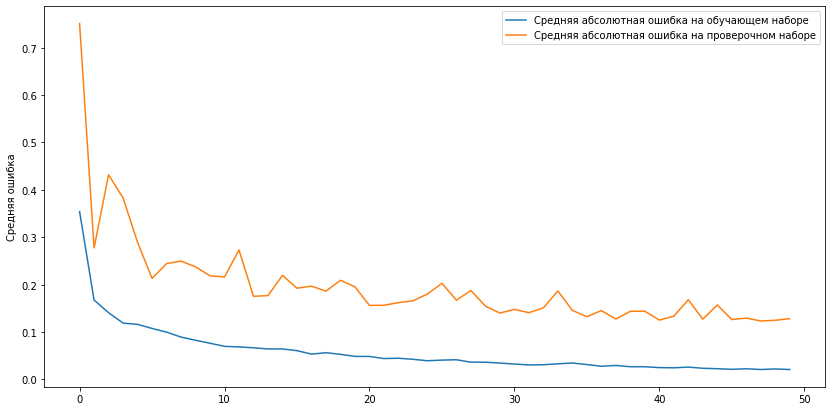

In [ ]:
#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

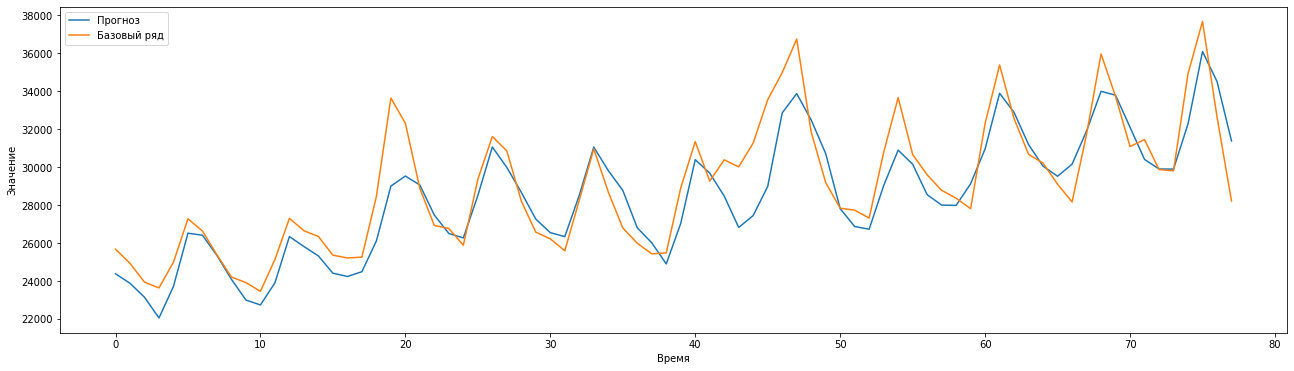

In [ ]:
#Прогнозируем данные текущей сетью
(predVal, yValUnscaled) = getPred(modelC, xVal[0], yVal[0], yScaler) #Прогнозируем данные

#Отображаем графики
showPredict(0, 160, 0, predVal, yValUnscaled)

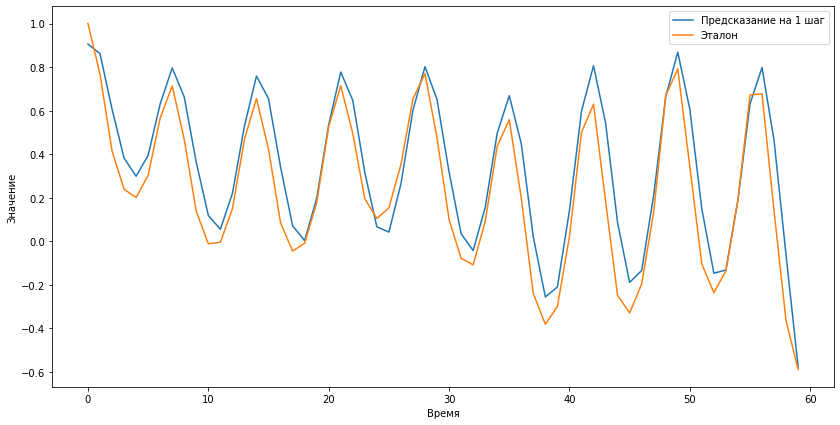

In [ ]:
#Отображаем корреляцию
#Используем выходной канал 
#Проверяем корреляцию на глубину 60 шагов
showCorr([0], 60, predVal, yValUnscaled)